# **IMPORTADO DE MÓDULOS/FUNCIONES**

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [102]:
from functions import normalize_by_max, simpsons_rule_array

# **LOAD PULSES**

In [103]:
Nev_Co60 = 200000  #Nùmero de eventos en las prácticas del máster
Nev_Na22 = 150000
Nt = 600
Nc = 2

In [104]:
#pulsos_Co60 = np.zeros((Nev_Co60,Nt,Nc))
#
#with open('/home/josea/PracticaTimingDigital/pulsoCo60', 'rb') as file:
#  for i in range(Nev_Co60):
#    for j in range(Nt):
#      try:
#        pulsos_Co60[i,j, :] = np.fromfile(file, dtype=np.float32, count = 2)
#      except EOFError:
#        break
#
#    a1, a2 = np.fromfile(file, dtype=np.float32, count=2)

In [105]:
#np.savez_compressed('/home/josea/PracticaTimingDigital/pulsoCo60', data = pulsos_Co60)

In [106]:
#data = np.load('/home/josea/PracticaTimingDigital/pulsoCo60.npz')
#pulsos_Co60 = data['data']

#data = np.load('/home/josea/PracticaTimingDigital/pulsoNa22.npz')
#data = data['data']

In [107]:
fichero_28 = np.fromfile('/home/josea/DEEP_TIMING/datos_Alba/fuentes_50k_Alba/co-2cm-8cm.dat', dtype='float32')
fichero_55 = np.fromfile('/home/josea/DEEP_TIMING/datos_Alba/fuentes_50k_Alba/co-5cm-5cm.dat', dtype='float32')
fichero_82 = np.fromfile('/home/josea/DEEP_TIMING/datos_Alba/fuentes_50k_Alba/co-8cm-2cm.dat', dtype='float32')

Nt2 = 600
Nev = 50000
Nc = 2
V28 = fichero_28[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
V55 = fichero_55[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
V82 = fichero_82[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))

data = V82

# **ENERGY FILTERING**

## **DETECTOR 0: 1332 KeV - DETECTOR 1: 1173 KeV**

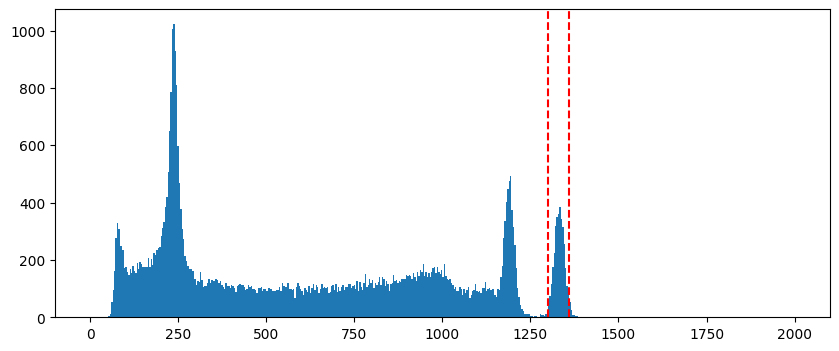

In [108]:
energy_dec0_comb1 = simpsons_rule_array(data[:,50:550,0],1) 


histogE, binsE = np.histogram(energy_dec0_comb1, bins = 500, range = [0,200]);
index = find_peaks(histogE, height = 500)[0][-1]
m = 1332.5/((binsE[index+1]+binsE[index])/2)
calibrado_dec0_comb1 = m*energy_dec0_comb1

#1332.5

gate_min_dec0_comb1 = 1300
gate_max_dec0_comb1 = 1360
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec0_comb1, bins = 500, range = [0,2000]);
plt.axvline(x = gate_min_dec0_comb1, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec0_comb1, color = 'r', linestyle = '--')

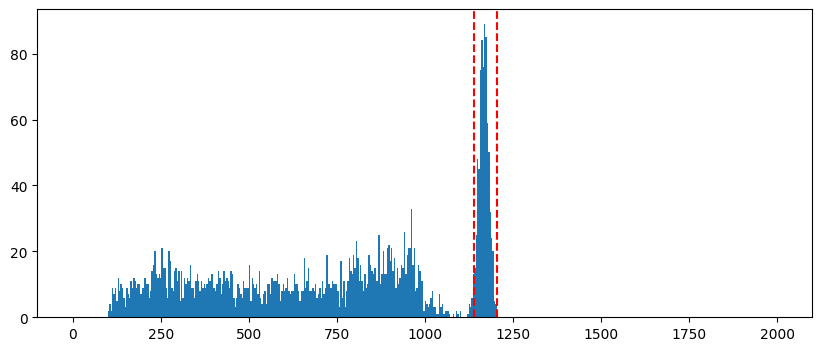

In [109]:
energy_dec1_comb1 = simpsons_rule_array(data[(calibrado_dec0_comb1>gate_min_dec0_comb1)  & (calibrado_dec0_comb1<gate_max_dec0_comb1),50:550,1],1)

histogE, binsE = np.histogram(energy_dec1_comb1, bins = 500, range = [0,200]);
index = find_peaks(histogE, height = 100)[0][-1]
m = 1173.2/((binsE[index+1]+binsE[index])/2)
calibrado_dec1_comb1 = m*energy_dec1_comb1

#1173.2


gate_min_dec1_comb1 = 1140
gate_max_dec1_comb1 = 1205
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec1_comb1, bins = 500, range = [0,2000])
plt.axvline(x = gate_min_dec1_comb1, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec1_comb1, color = 'r', linestyle = '--')

## **DETECTOR 1: 1332 KeV - DETECTOR 0: 1173 Kev**

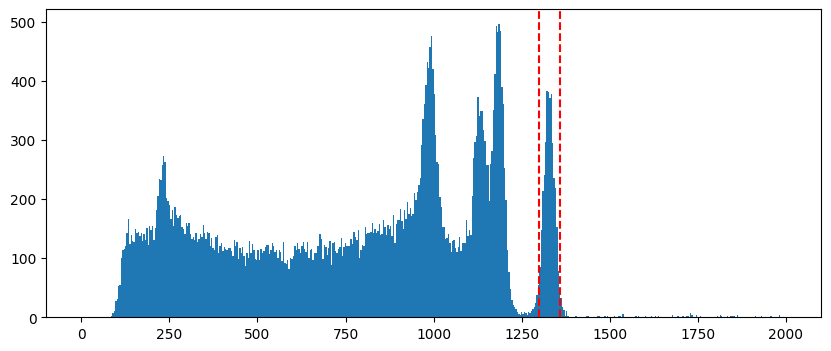

In [110]:
energy_dec1_comb2 = simpsons_rule_array(data[:,50:500,1],1)

histogE, binsE = np.histogram(energy_dec1_comb2, bins = 500,range = [0,200]);
index = find_peaks(histogE, height = 500)[0][-1]
m = 1332.5/((binsE[index+1] + binsE[index])/2)
calibrado_dec1_comb2 = m*energy_dec1_comb2

gate_min_dec1_comb2 = 1300
gate_max_dec1_comb2 = 1360
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec1_comb2, bins = 500, range = [0,2000])
plt.axvline(x = gate_min_dec1_comb2, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec1_comb2, color = 'r', linestyle = '--')

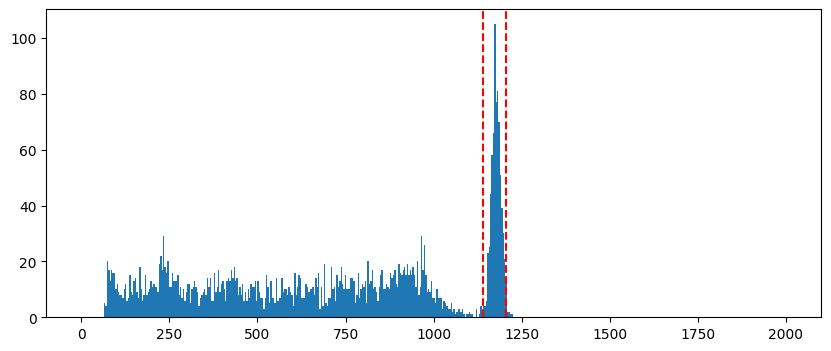

In [115]:
energy_dec0_comb2 = simpsons_rule_array(data[(calibrado_dec1_comb2>gate_min_dec1_comb2)  & (calibrado_dec1_comb2<gate_max_dec1_comb2),50:550,0],1)

histogE, binsE = np.histogram(energy_dec0_comb2,bins = 500,range = [0,200]);
index = find_peaks(histogE, height = 50)[0][-1]
m = 1173.2/((binsE[index+1] + binsE[index])/2)
calibrado_dec0_comb2 = m*energy_dec0_comb2


gate_min_dec0_comb2 = 1140
gate_max_dec0_comb2 = 1205
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec0_comb2,bins = 500, range = [0,2000]);
plt.axvline(x = gate_min_dec0_comb2, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec0_comb2, color = 'r', linestyle = '--')

# **NORMALIZE**

In [116]:
data_filt_comb1 = data[(calibrado_dec0_comb1>gate_min_dec0_comb1)  & (calibrado_dec0_comb1<gate_max_dec0_comb1),:,:]
data_filt_comb1 = data_filt_comb1[(calibrado_dec1_comb1>gate_min_dec1_comb1)  & (calibrado_dec1_comb1<gate_max_dec1_comb1),:,:]
data_filt_comb2 = data[(calibrado_dec1_comb2>gate_min_dec1_comb2)  & (calibrado_dec1_comb2<gate_max_dec1_comb2),:,:]
data_filt_comb2 = data_filt_comb2[(calibrado_dec0_comb2>gate_min_dec0_comb2)  & (calibrado_dec0_comb2<gate_max_dec0_comb2),:,:]

data_filt = np.concatenate((data_filt_comb1, data_filt_comb2), axis = 0)
data_filt = data_filt_comb1
print(data_filt.shape)

#------------------------------------------------------- Normalizar Pulsos ------------------------------------------------------------------------------------
data_filt_norm = normalize_by_max(data_filt, fit_polynomial = True)

(736, 600, 2)


# **CHECK FOR OUTLIERS**

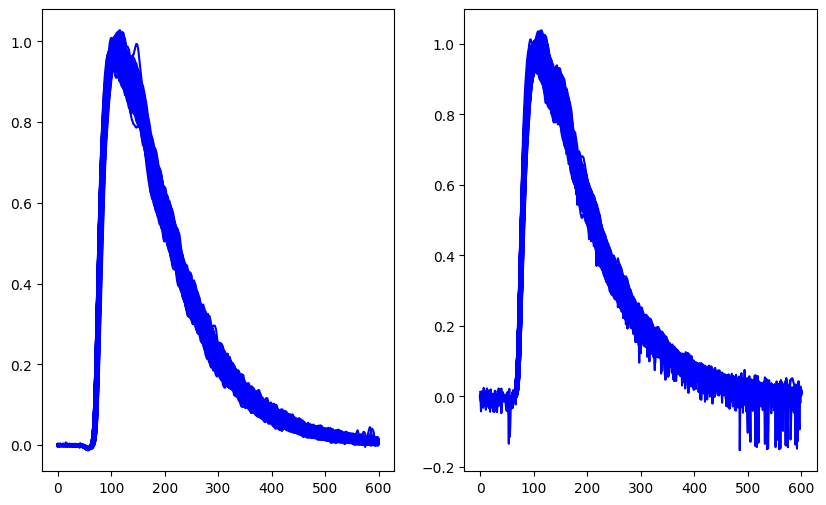

In [117]:
#data_filt_norm = np.delete(data_filt_norm, [8613, 10843, 17162, 75, 15604, 19638, 20079, 21888, 8539], axis = 0)

# Con el plot se ve si hay algún pulso que empiece mal/que no cuadre con el otro detector
a_dec0 = []
a_dec1 = []
plt.figure(figsize = (10,6))
for i in range(data_filt_norm.shape[0]):
  plt.subplot(121)
  plt.plot(data_filt_norm[i,:,0], 'b-')
  plt.subplot(122)
  plt.plot(data_filt_norm[i,:,1], 'b-')
  a_dec0.append(np.where(data_filt_norm[i,:,0] == np.max(data_filt_norm[i,:,0]))[0][0])
  a_dec1.append(np.where(data_filt_norm[i,:,1] == np.max(data_filt_norm[i,:,1]))[0][0])
a_dec0 = np.array(a_dec0)
a_dec1 = np.array(a_dec1)

In [119]:
#np.savez_compressed('/home/josea/TFM_Alba_Co60_8cm_2cm_fullgate_polyfit', data = data_filt_norm)